<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/data_processing/lessons/binary_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reading Binary Files

Unlike text files, the contents of binaries cannot be viewed directly. We have to known the exact internal structure of the file. The binary files are read/written faster comparing to text files and their size is smaller.

We'll convert the digitan sandbox binary grid format to an ASCII grid file.

The binary format contains integer and folat numbers. It starts with two integers the number of rows and columns in the grid. It follows the bounding box of the grid, fout float data. Finaly the elevations in the grid come as float numbers.

In [2]:
!gdown --id 1LzfWm9n48wa8WSvtTp1dMjx5zJXV3dfb -O sample_data/test.grid

Downloading...
From: https://drive.google.com/uc?id=1LzfWm9n48wa8WSvtTp1dMjx5zJXV3dfb
To: /content/sample_data/test.grid
100% 1.23M/1.23M [00:00<00:00, 28.5MB/s]


In [4]:
import struct         # for binary data

##Reading and converting binary data

In [12]:
ifile = open('sample_data/test.grid', "rb")         # open binary input file
idataset = ifile.read()                             # read all data into memory
(cols, rows) = struct.unpack("2i", idataset[:8])    # get column and row count
(xul, ylr, xlr, yul) = struct.unpack("4f", idataset[8:24])  # get extent of grid
psize = (xlr - xul) / cols                          # pixel size
data = struct.unpack("f" * (rows * cols), idataset[24:])    # elevations
print(f"columns: {cols}  rows: {rows}")
print(f"extent: {xul:.2f},{ylr:.2f} {xlr:.2f},{yul:.2f}")
print(f"max. elev. {max(data):.2f}  min. elev. {min(data):.2f}")

columns: 639  rows: 480
extent: 609913.25,4267994.50 610004.62,4268061.50
max. elev. 11.85  min. elev. -32767.00


##Export data to ASCII GRID format



In [14]:
with open('sample_data/test.asc', 'w') as ofile:
  # write header
  print(f"NCOLS {cols}", file=ofile)
  print(f"NROWS {rows}", file=ofile)
  print(f"XLLCORNER {xul:.2f}", file=ofile)
  print(f"YLLCORNER {yul:.2f}", file=ofile)
  print(f"CELLSIZE {psize:.2f}", file=ofile)
  print(f"NODATA_VALUE -32767", file=ofile)
  for i in range(rows):
    for j in range(cols):
      print(f"{data[i * cols + j]} ", end="", file=ofile)
    print(" ", file=ofile)

ASCII GRID files can be used in several GIS software, for example in QGIS. Here we use matplotlib to display data.

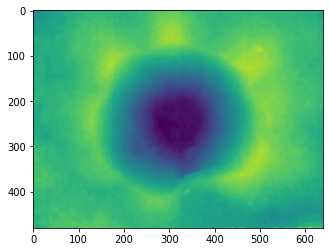

In [22]:
import numpy as np
import matplotlib.pyplot as plt
grid=np.array(data).reshape(rows,cols)            # convert to numpy array
grid[grid < -32760] = 0                           # change nodata to zero
gray = (grid / np.max(grid) * 255).astype(int)    # change elevation to grayscale
plt.imshow(gray)

**Tasks**

*   Display the ASCII GRID in QGIS
*   Change the colors of the plot, to be more convetional to topography
*   Using the Augmented Reality Sandbox create a binary grid file and convert it to ASCII GRID
*   Try to display GRID data in 3D (surfaceplot)
*   Try to processs other binary files with Python

